# Importing Libraries 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sn
import cv

# Fetching Data for binary classification function
### Labelling using ImageDataGenerator()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# TRAINING_DATA
#### baggage_carriers - 96 images
#### birds - 95 images
#### hangar - 117 images
#### plane - 87 images
#### tow_tractor - 126 images 

In [3]:
#train_dir 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(
                'C:/Users/Prajval P/LTPL-PRJ-045/training_dir/',
                target_size = (224, 224),
                batch_size = 25,
                class_mode = 'sparse')

Found 518 images belonging to 5 classes.


# VALIDATION_DATA
#### baggage_carriers - 5 images
#### birds - 5 images
#### hangar - 5 images
#### plane - 5 images
#### tow_tractor - 5 images 

In [4]:
#validation_dir
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       fill_mode = 'nearest')
validation_generator = validation_datagen.flow_from_directory(
                'C:/Users/Prajval P/LTPL-PRJ-045/validation_dir',
                target_size = (224, 224),
                batch_size = 2,
                class_mode = 'sparse')

Found 25 images belonging to 5 classes.


# Designing the model 

In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Dense layer to classify the 5 classes 
    tf.keras.layers.Dense(5, activation='softmax')
])

In [6]:
from tensorflow.keras.optimizers import RMSprop

In [7]:
model.compile(optimizer = RMSprop(lr = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [8]:
history = model.fit(train_generator,
                              steps_per_epoch=15,  
                              epochs = 40,
                              validation_data = validation_generator,
                              validation_steps = 15,
                              verbose = 2)

Epoch 1/40
15/15 - 13s - loss: 1.8466 - acc: 0.2453 - val_loss: 1.5773 - val_acc: 0.2414
Epoch 2/40
15/15 - 12s - loss: 1.5909 - acc: 0.3179 - val_loss: 1.5365 - val_acc: 0.2759
Epoch 3/40
15/15 - 12s - loss: 1.4352 - acc: 0.4076 - val_loss: 2.0422 - val_acc: 0.2759
Epoch 4/40
15/15 - 14s - loss: 1.3843 - acc: 0.4293 - val_loss: 3.7444 - val_acc: 0.1724
Epoch 5/40
15/15 - 13s - loss: 1.3074 - acc: 0.5027 - val_loss: 1.4852 - val_acc: 0.3571
Epoch 6/40
15/15 - 14s - loss: 1.3045 - acc: 0.5217 - val_loss: 1.3225 - val_acc: 0.3103
Epoch 7/40
15/15 - 13s - loss: 1.1460 - acc: 0.5489 - val_loss: 1.1807 - val_acc: 0.5172
Epoch 8/40
15/15 - 14s - loss: 1.0990 - acc: 0.5973 - val_loss: 1.3986 - val_acc: 0.4138
Epoch 9/40
15/15 - 13s - loss: 1.1323 - acc: 0.5978 - val_loss: 1.4373 - val_acc: 0.3929
Epoch 10/40
15/15 - 13s - loss: 0.9651 - acc: 0.6603 - val_loss: 1.3616 - val_acc: 0.4483
Epoch 11/40
15/15 - 14s - loss: 0.8808 - acc: 0.6693 - val_loss: 2.2926 - val_acc: 0.4138
Epoch 12/40
15/15 -

# PLOTTING LOSS AND ACCURACY

Text(0.5, 1.0, 'Training and validation loss')

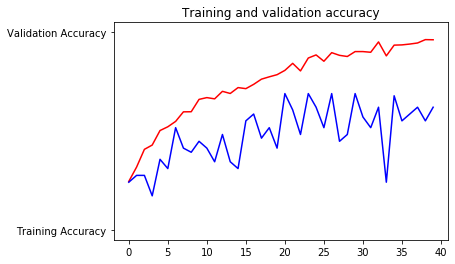

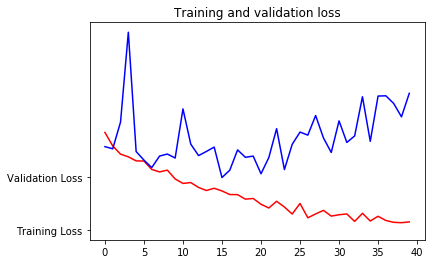

In [9]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


# Retrieve a list of list results on training and test data
# sets for each training epoch

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


# Plot training and validation loss per epoch

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3